# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 6 y 7

### **Modelado de tópicos - LSI/LDA**

#### **Nombres y matrículas de los integrantes del equipo:**



* José Alberto Mtanous Treviño
* Javier Muñoz Barrios
* José Francisco Muñoz Del Ángel
* César Alexis Nájera Mendoza
* Annette Cristina Narváez Andrade



In [99]:
!python3 -m spacy download es_core_news_sm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 2.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [100]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import scipy
import gensim
import pandas as pd
from nltk.stem import WordNetLemmatizer
import nltk
import re
import spacy
from nltk.corpus import stopwords
import numpy as np
nlp = spacy.load("es_core_news_sm")
import seaborn as sns
import matplotlib.pyplot as plt
#
import gensim
import gensim.corpora as corpora
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

## **Pregunta - 1:**  
Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en 5658 noticias de varios periódicos de España.  

El archivo de texto es una lista en el siguiente formato:  
 [{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]  

Donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias. 

In [101]:
df = pd.read_json('./noticiasTopicModeling.txt')['titular'].to_frame()
df.rename(columns = {'titular':'noticia'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   noticia  5658 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB


##**Pregunta - 2:**

Realiza el proceso de limpieza.  

Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en español. Recuerda que el objetivo es identificar los tokens (palabras) que describan mejor la distribución de cada tema. 
NOTA: Recuerda que esta es una técnica no supervisada, por lo que no requerimos hacer una 
partición de los datos.










In [208]:
# Para la limpieza vamos a usar la librería spacy
# Esta libreria nos permite tokenizar y lematizar las palabras de manera sencilla
# Además nos permite clasificar las palabras por grupos smánticos

# Para clasifica por temas, considero que solo debemos usar los sustantivos, nombres propios y adjetivos
# los verbos creo que no tienen relevancia en la clásificación de temas, tampoco sin relevantes los
# stopwords y elementos auxiliares de las oraciones.


import spacy
# Cargamos el modelo pequeño de lenguaje para esta librería
nlp = spacy.load("es_core_news_sm")


lemmatized_tokens = []
lemmatized_noticia = []
for noticia in df['noticia']:
    doc = nlp(noticia)
#    _lemmatized_tokens = [token.lemma_ + "_" + token.pos_ for token in doc if (token.pos_ in ["NOUN"] and token.is_alpha)]
    _lemmatized_tokens = [token.lemma_ for token in doc if (token.pos_ in ["NOUN", "ADJ"] and token.is_alpha)]
    lemmatized_tokens.append(_lemmatized_tokens)
    lemmatized_noticia.append(' '.join(_lemmatized_tokens))

df['lemmatized_tokens'] = lemmatized_tokens
df['lemmatized_noticia'] = lemmatized_noticia
df.head()


,noticia,lemmatized_tokens,lemmatized_noticia
0,Vox se sube a la ola de la extrema derecha eur...,"[ola, extremo, derecha, europeo, fin, excepció...",ola extremo derecha europeo fin excepción español
1,Mensajes xenófobos de Vox y la cancelación de ...,"[mensaje, xenófobo, cancelación, festividad, i...",mensaje xenófobo cancelación festividad islámi...
2,El Gobierno alega el estado de alarma para no ...,"[estado, alarma, dato, enero]",estado alarma dato enero
3,La fiscala,[fiscala],fiscala
4,La CorteIDH pide a Panamá informe sobre migran...,"[migrant, frontera]",migrant frontera


## **Pregunta - 3:**  
Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con 
algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el 
significado de cada renglón? ¿Y el significado de cada columna? 


In [209]:
tfidf = TfidfVectorizer(lowercase=False, max_df=1.0, min_df=1)
tfidf_sparse = tfidf.fit_transform(df['lemmatized_noticia'].to_list())

In [210]:
tfidf_dense = pd.DataFrame(tfidf_sparse.toarray(), columns=tfidf.get_feature_names_out())
tfidf_dense.head(5)

,abandonado,abandono,abaratamiento,abdicación,abertzale,abierto,abismo,abogado,abolicionista,abordo,...,índice,íntimo,ópera,órdago,órden,órgano,óseo,último,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En este caso nuestros tokens son las palabras lematizadas, pero además de lematizar, agregamos como parte del token el tipo de palabra, esto nos ayuda a poder distinguir entre homónimos que pueden ser nombres propios, por ejemplo, el apellido Corona generará un token diferente del sustantivo corona.  

La mtriz tfidf esta compuesta por un renglón por cada documento, en este caso cada documento es una noticia y las columnas son todo los tokens encontrados en el vocabulario. El valor de cada columna es el peso específico de ese token en la noticia, tokens que aparecen muy poco a lo largo del documento tienen un valor muy bajo, igualmente ocurre con los tokens que parecen con gran frecuencia en nuestros documentos. Cabe mencionar que la mayoría de los valores de esta matriz es cero, el motivo obedece a que cada documento individual se compone de un subconjunto muy pequeño de todo el vocabulario encontrado a lo largo de todos los documentos.

## **Pregunta - 4:**  
Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con 10 componentes y obtener el gráfico de la importancia relativa de estas. 


In [211]:
r = 10
lsi_obj = TruncatedSVD(n_components=r,
                       n_iter=100,
                       random_state=0)

tfidf_lsi = lsi_obj.fit_transform(tfidf_sparse)
Sigma = lsi_obj.singular_values_
V_T = lsi_obj.components_.T
sigmas = lsi_obj.singular_values_
sigmas

array([7.49044161, 5.73384863, 5.23874967, 5.15599023, 4.80392474,
       4.67697861, 4.408427  , 4.28583629, 4.17536275, 4.07226561])

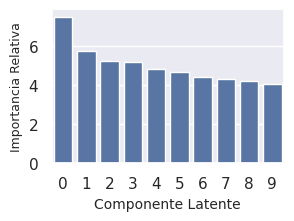

In [212]:
sns.set(rc={'figure.figsize':(3,2)})
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma)
chart.set_xlabel('Componente Latente', fontdict={'size':10})
chart.set_ylabel('Importancia Relativa', fontdict={'size':9})
plt.show()

## **Pregunta - 5:**  
Obtener la matriz tokens-temas (term-topic) a partir de la matriz V_T de la descomposición SVD.  
Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas. 

In [213]:
lsi_term_topic = V_T
lsi_term_topic.shape

(4998, 10)

In [214]:
term_names = list(tfidf.get_feature_names_out())
term_names[1:10]

['abandono',
 'abaratamiento',
 'abdicación',
 'abertzale',
 'abierto',
 'abismo',
 'abogado',
 'abolicionista',
 'abordo']

In [215]:
term_topic_matrix = pd.DataFrame(data=lsi_term_topic,
                                 index = term_names,
                                 columns = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]
                                 )
term_topic_matrix.shape

(4998, 10)

In [216]:
term_topic_matrix

,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
abandonado,0.000072,0.000345,0.000189,-0.000126,0.000360,-0.000013,0.000948,0.000803,-0.000402,-0.000667
abandono,0.000364,0.001506,0.000525,-0.000272,0.000883,-0.001406,0.003512,0.001793,-0.002611,-0.000149
abaratamiento,0.000142,0.000789,0.002398,-0.000998,-0.000615,-0.001040,-0.000103,-0.000100,-0.000127,-0.000084
abdicación,0.000092,0.000538,0.000687,0.000113,0.000141,0.000136,0.000478,0.003077,0.000319,-0.000011
abertzale,0.000126,0.000568,0.000172,-0.000223,0.000732,0.000153,0.000566,0.001803,-0.000286,-0.000290
...,...,...,...,...,...,...,...,...,...,...
órgano,0.000417,0.001129,0.001116,0.000868,0.002479,-0.001891,0.001677,0.005003,-0.002176,-0.001041
óseo,0.000022,0.000078,0.000026,-0.000047,0.000192,0.000007,0.000087,0.000233,-0.000029,0.000185
último,0.430695,-0.217532,-0.011483,-0.230323,-0.151222,0.258301,0.035839,0.058798,0.018515,-0.025368
único,0.003290,0.016327,-0.002031,-0.010419,0.005189,0.001153,0.014527,0.016120,-0.020665,-0.015297


## **Pregunta - 6:**  
Con base a la cantidad de conceptos latentes que determinaste en el ejercicio anterior, obtener cada 
uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de 
dichos conceptos latentes? ¿Se identifican claramente las temáticas de cada uno de ellos?

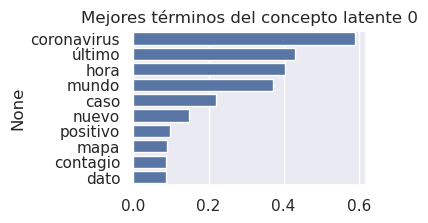

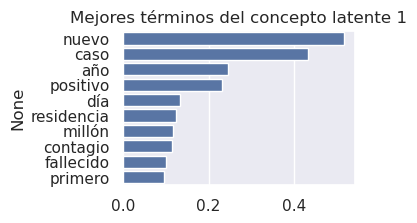

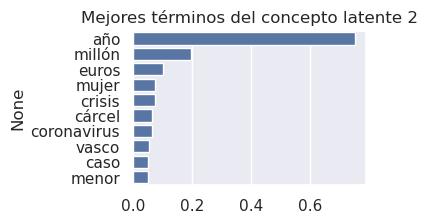

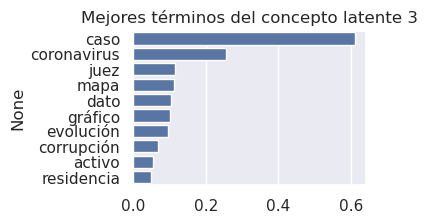

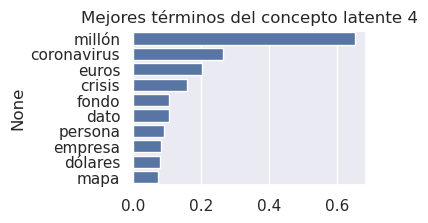

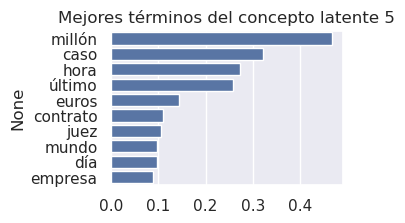

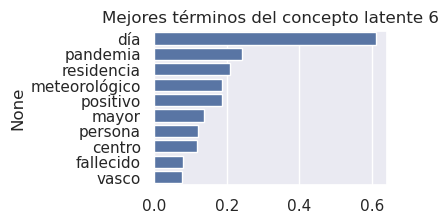

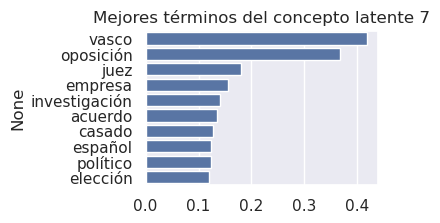

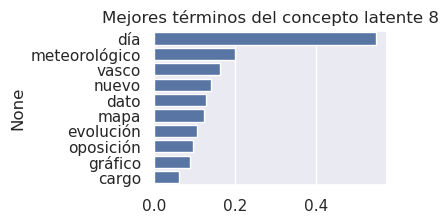

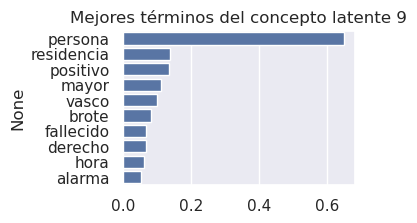

In [241]:
top_w = 10

for i,cl in enumerate(term_topic_matrix):
    data = term_topic_matrix[cl]
    data = data.sort_values(ascending=False)
    top_w_matrix = data[:top_w]
    sns.set(rc={'figure.figsize':(3,2)})
    plt.figure(i)
    plt.title(f'Mejores términos del concepto latente {i}')
    fig = sns.barplot(x=top_w_matrix.values, y=top_w_matrix.index)

No quedan claros los tópicos, en varios parece que hablan de temas relacionados con covid y pandemia, en otros sobre casos judiciales y pagos de multas y en un par sobre temas relacionados con mujeres pero no queda claro como podríamos difencia un tópico de otro.

## **Pregunta - 7:**  
Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación correspondiente y aplica de preferencia el modelo paralelizable:  
https://radimrehurek.com/gensim/models/ldamodel.html  
https://radimrehurek.com/gensim/models/ldamulticore.html  


## **Pregunta - 8:**  
Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus resultados con el método LSI.  

¿Qué encuentras de coincidencias y diferencias?  
¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar? 